In [1]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline
import tools

Using TensorFlow backend.


In [2]:
file_app_train = './data/application_train.csv'
app_train_data = pd.read_csv(file_app_train)

# Preparing data

In [3]:
# app_train_data.columns.values

In [4]:
select_cols = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
    'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE']

In [5]:
data = app_train_data[select_cols].copy(deep=True)
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    print(data.head(10))

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2     

## Correct data

In [6]:
tools.correctApplicationData(data)

## Convert object types to a label first

In [7]:
data_n_features = data.shape[1]-2 # counting the columns
print('Original num of feature: {}'.format(data_n_features))

Original num of feature: 16


In [8]:
data.select_dtypes('object').columns.values

array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'],
      dtype=object)

In [9]:
data.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461         -637.0   
1               Married  House / apartment      -16765        -1188.0   
2  Single / not married  House / apartment      -19046         -225.0   
3        Civil marriage  House / apartment      -19005        -3039.0   
4  Single / not married  House / apartment      -19932        -3038.0   

  OCCUPATION_TYPE  
0        Laborers  
1      Core staff  
2        Laborers  
3        Laborers  
4      Core staff

In [10]:
labelDict = data.pipe(tools.getLabelDict)
labelDict

{'NAME_CONTRACT_TYPE': {'Cash loans': 0, 'Revolving loans': 1},
 'CODE_GENDER': {'M': 0, 'F': 1},
 'FLAG_OWN_CAR': {'N': 0, 'Y': 1},
 'FLAG_OWN_REALTY': {'Y': 0, 'N': 1},
 'NAME_INCOME_TYPE': {'Working': 0,
  'State servant': 1,
  'Commercial associate': 2,
  'Pensioner': 3,
  'Unemployed': 4,
  'Student': 5,
  'Businessman': 6,
  'Maternity leave': 7},
 'NAME_EDUCATION_TYPE': {'Secondary / secondary special': 0,
  'Higher education': 1,
  'Incomplete higher': 2,
  'Lower secondary': 3,
  'Academic degree': 4},
 'NAME_FAMILY_STATUS': {'Single / not married': 0,
  'Married': 1,
  'Civil marriage': 2,
  'Widow': 3,
  'Separated': 4},
 'NAME_HOUSING_TYPE': {'House / apartment': 0,
  'Rented apartment': 1,
  'With parents': 2,
  'Municipal apartment': 3,
  'Office apartment': 4,
  'Co-op apartment': 5},
 'OCCUPATION_TYPE': {'Laborers': 0,
  'Core staff': 1,
  'Accountants': 2,
  'Managers': 3,
  'Unknown': 4,
  'Drivers': 5,
  'Sales staff': 6,
  'Cleaning staff': 7,
  'Cooking staff': 8,


In [11]:
data.pipe(tools.convertObjToLabel, labelDict)

In NAME_CONTRACT_TYPE, replace Cash loans with 0
In NAME_CONTRACT_TYPE, replace Revolving loans with 1
In CODE_GENDER, replace M with 0
In CODE_GENDER, replace F with 1
In FLAG_OWN_CAR, replace N with 0
In FLAG_OWN_CAR, replace Y with 1
In FLAG_OWN_REALTY, replace Y with 0
In FLAG_OWN_REALTY, replace N with 1
In NAME_INCOME_TYPE, replace Working with 0
In NAME_INCOME_TYPE, replace State servant with 1
In NAME_INCOME_TYPE, replace Commercial associate with 2
In NAME_INCOME_TYPE, replace Pensioner with 3
In NAME_INCOME_TYPE, replace Unemployed with 4
In NAME_INCOME_TYPE, replace Student with 5
In NAME_INCOME_TYPE, replace Businessman with 6
In NAME_INCOME_TYPE, replace Maternity leave with 7
In NAME_EDUCATION_TYPE, replace Secondary / secondary special with 0
In NAME_EDUCATION_TYPE, replace Higher education with 1
In NAME_EDUCATION_TYPE, replace Incomplete higher with 2
In NAME_EDUCATION_TYPE, replace Lower secondary with 3
In NAME_EDUCATION_TYPE, replace Academic degree with 4
In NAME_F

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   0            0             0   
1           100003       0                   0            1             0   
2           100004       0                   1            0             1   
3           100006       0                   0            1             0   
4           100007       0                   0            0             0   
5           100008       0                   0            0             0   
6           100009       0                   0            1             1   
7           100010       0                   0            0             1   
8           100011       0                   0            1             0   
9           100012       0                   1            0             0   
10          100014       0                   0            1             0   
11          100015       0                   0            1             0   
12          100016       0                   0            1             0   
13          100017       0                   0            0             1   
14          100018       0                   0            1             0   
15          100019       0                   0            0             1   
16          100020       0                   0            0             0   
17          100021       0                   1            1             0   
18          100022       0                   1            1             0   
19          100023       0                   0            1             0   
20          100024       0                   1            0             1   
21          100025       0                   0            1             1   
22          100026       0                   0            1             0   
23          100027       0                   0            1             0   
24          100029       0                   0            0             1   
25          100030       0                   0            1             0   
26          100031       1                   0            1             0   
27          100032       0                   0            0             0   
28          100033       0                   0            0             1   
29          100034       0                   1            0             0   
...            ...     ...                 ...          ...           ...   
307481      456225       1                   0            0             0   
307482      456226       0                   0            1             1   
307483      456227       0                   0            1             0   
307484      456228       0                   0            1             1   
307485      456229       0                   1            1             0   
307486      456230       0                   0            1             1   
307487      456231       0                   0            0             0   
307488      456232       0                   0            1             0   
307489      456233       1                   0            1             0   
307490      456234       0                   0            0             0   
307491      456235       0                   0            0             1   
307492      456236       0                   0            0             1   
307493      456237       0                   0            1             0   
307494      456238       0                   0            0             1   
307495      456239       0                   0            0             1   
307496      456240       0                   1            1             0   
307497      456241       0                   0            1             1   
307498      456242       0                   0            0             1   
307499      456243       0                   0            1             0   
307500      456244       0                   0            1             0   
3075

## Convert a data batch to numpy array

The function should return a all-one-hot representation for all object-type column

In [12]:
import importlib
importlib.reload(tools)

<module 'tools' from '/Users/vikube/Documents/Machine Learning--projects/kaggle_home_credite_default/tools.py'>

In [13]:
cvdata, scaleFactors = tools.genNPData(data, labelDict=labelDict)
X_train = cvdata[:, 2:-1]
X_train.shape

(307511, 57)

In [14]:
scaleFactors

{'SK_ID_CURR': (278180.51857657125, 102790.00821577091),
 'TARGET': (0.08072881945686496, 0.2724182027067315),
 'AMT_INCOME_TOTAL': (168797.9192969845, 237122.7607262434),
 'AMT_CREDIT': (599025.9997057016, 402490.1225621855),
 'AMT_ANNUITY': (27108.573909183444, 14493.430951156583),
 'AMT_GOODS_PRICE': (538396.2074288892, 369278.82596304925),
 'DAYS_BIRTH': (-16036.995066843137, 4363.981536117146),
 'DAYS_EMPLOYED': (-2384.169324613206, 2117.3785298414386)}

In [15]:
Y_train = data['TARGET'].values

In [16]:
data.head(5)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0         351000.0                 0                    0                   0   
1        1129500.0                 1                    1                   1   
2         135000.0                 0                    0                   0   
3         297000.0                 0                    0                   2   
4         513000.0                 0                    0                   0   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  OCCUPATION_TYPE  
0                  0       -9461         -637.0                0  
1                  0      -16765        -1188.0                1  
2                  0      -19046         -225.0                0  
3                  0      -19005        -3039.0                0  
4                  0      -19932        -3038.0                1

In [17]:
X_train.shape

(307511, 57)

In [18]:
import pickle
train_mani = {'labelDict': labelDict,
              'scaleFactors': scaleFactors}
with open('train_manipulation.pickle','wb') as f:
    pickle.dump(train_mani, f)

# Model and training

In [27]:
import importlib
import keras.backend as K
import tensorflow as tf
importlib.reload(tools)

K.clear_session()

buildModel = tools.buildModel
recall = tools.as_keras_metric(tf.metrics.recall)
precision = tools.as_keras_metric(tf.metrics.precision)
f1_score = tools.f1_score

In [28]:
model = buildModel((X_train.shape[1],))

In [29]:
optimizer = keras.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[f1_score, precision, recall])
# model.compile(optimizer=optimizer, loss=tools.loss, metrics=[f1_score, precision, recall])

In [30]:
model.fit(X_train, Y_train, batch_size=128*4, epochs=100, validation_split=0.05)

Train on 292135 samples, validate on 15376 samples
Epoch 1/100
292135/292135 [==============================] - 2s 6us/step - loss: 0.3139 - f1_score: 0.0137 - precision: 0.0810 - recall: 0.9982 - val_loss: 0.2656 - val_f1_score: 0.0106 - val_precision: 0.0808 - val_recall: 1.0000
Epoch 2/100
292135/292135 [==============================] - 2s 6us/step - loss: 0.2852 - f1_score: 0.0113 - precision: 0.0808 - recall: 1.0000 - val_loss: 0.2669 - val_f1_score: 0.0102 - val_precision: 0.0808 - val_recall: 1.0000
Epoch 3/100
292135/292135 [==============================] - 2s 6us/step - loss: 0.2771 - f1_score: 0.0102 - precision: 0.0807 - recall: 1.0000 - val_loss: 0.2655 - val_f1_score: 0.0092 - val_precision: 0.0807 - val_recall: 1.0000
Epoch 4/100
292135/292135 [==============================] - 2s 6us/step - loss: 0.2741 - f1_score: 0.0096 - precision: 0.0806 - recall: 1.0000 - val_loss: 0.2663 - val_f1_score: 0.0096 - val_precision: 0.0807 - val_recall: 1.0000
Epoch 5/100
292135/292135

292135/292135 [==============================] - 2s 6us/step - loss: 0.2728 - f1_score: 0.0094 - precision: 0.0807 - recall: 1.0000 - val_loss: 0.2659 - val_f1_score: 0.0094 - val_precision: 0.0807 - val_recall: 1.0000
Epoch 37/100
292135/292135 [==============================] - 2s 6us/step - loss: 0.2727 - f1_score: 0.0094 - precision: 0.0807 - recall: 1.0000 - val_loss: 0.2651 - val_f1_score: 0.0087 - val_precision: 0.0807 - val_recall: 1.0000
Epoch 38/100
292135/292135 [==============================] - 2s 6us/step - loss: 0.2724 - f1_score: 0.0095 - precision: 0.0807 - recall: 1.0000 - val_loss: 0.2674 - val_f1_score: 0.0095 - val_precision: 0.0807 - val_recall: 1.0000
Epoch 39/100
292135/292135 [==============================] - 2s 6us/step - loss: 0.2725 - f1_score: 0.0094 - precision: 0.0807 - recall: 1.0000 - val_loss: 0.2668 - val_f1_score: 0.0094 - val_precision: 0.0807 - val_recall: 1.0000
Epoch 40/100
292135/292135 [==============================] - 2s 6us/step - loss: 0.2

292135/292135 [==============================] - 2s 6us/step - loss: 0.2718 - f1_score: 0.0095 - precision: 0.0807 - recall: 1.0000 - val_loss: 0.2667 - val_f1_score: 0.0095 - val_precision: 0.0807 - val_recall: 1.0000
Epoch 72/100
292135/292135 [==============================] - 2s 6us/step - loss: 0.2722 - f1_score: 0.0094 - precision: 0.0807 - recall: 1.0000 - val_loss: 0.2662 - val_f1_score: 0.0096 - val_precision: 0.0807 - val_recall: 1.0000
Epoch 73/100
292135/292135 [==============================] - 2s 6us/step - loss: 0.2723 - f1_score: 0.0095 - precision: 0.0807 - recall: 1.0000 - val_loss: 0.2654 - val_f1_score: 0.0088 - val_precision: 0.0807 - val_recall: 1.0000
Epoch 74/100
292135/292135 [==============================] - 2s 6us/step - loss: 0.2718 - f1_score: 0.0095 - precision: 0.0807 - recall: 1.0000 - val_loss: 0.2662 - val_f1_score: 0.0095 - val_precision: 0.0807 - val_recall: 1.0000
Epoch 75/100
292135/292135 [==============================] - 2s 6us/step - loss: 0.2

In [31]:
Y_pred = model.predict(X_train)

In [33]:
model.save_weights('small_train.h5')

(array([ 3843.,  5788., 12290., 20149., 30507., 40235., 43288., 40165.,
        40017., 71229.]),
 array([1.37744049e-18, 1.18667722e-02, 2.37335443e-02, 3.56003165e-02,
        4.74670887e-02, 5.93338609e-02, 7.12006330e-02, 8.30674052e-02,
        9.49341774e-02, 1.06800950e-01, 1.18667722e-01]),
 <a list of 10 Patch objects>)

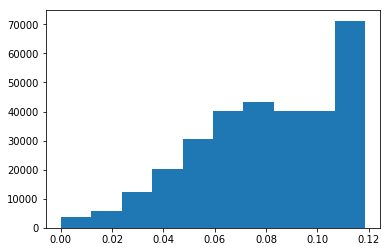

In [32]:
import matplotlib.pyplot as plt
plt.hist(Y_pred)